Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dilaw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Processing

In [4]:
imdb_data = pd.read_csv('dataset.csv')

In [5]:
imdb_data.shape

(50000, 4)

In [6]:
imdb_data.head()

,index,review,sentiment,stemmed_content
0,0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


Stemming

In [7]:
port_stem = PorterStemmer()


In [8]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content 

In [9]:
# imdb_data['stemmed_content'] = imdb_data['review'].apply(stemming)

In [10]:
# imdb_data.to_csv('dataset.csv')

# saving processed dataset

In [11]:
imdb_data.head()

,index,review,sentiment,stemmed_content
0,0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod hook right ...
1,1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [12]:
print(imdb_data['stemmed_content'])

0        one review mention watch oz episod hook right ...
1        wonder littl product br br film techniqu unass...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: stemmed_content, Length: 50000, dtype: object


In [13]:
print(imdb_data['sentiment'])

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [14]:
X = imdb_data['stemmed_content'].values
Y = imdb_data['sentiment'].values

In [15]:
print(X)

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

In [16]:
print(Y)

[1 1 1 ... 0 0 0]


In [17]:
print(imdb_data.shape)

(50000, 4)


Spliting Data to Training data

In [18]:
X_train,X_test,Y_train, Y_test = train_test_split(X , Y, test_size = 0.2, stratify = Y, random_state = 69)

In [19]:
# X_train = np.expand_dims(X_train, -1)
# X_test = np.expand_dims(X_test, -1)
print(X.shape,X_train.shape,X_test.shape)

(50000,) (40000,) (10000,)


In [20]:
print(X_train)

['origin care bear cousin saw origin film notic discrep cousin rais care bear rather meet later howev problem prefer treat film separ interpret babi ador fun watch play grow favourit swift heart rabbit villain delight menac shapeshift could empathis three children sinc never good sport either cree summer excel christi song sweet memor open heart love toy enjoy origin miss'
 'expect cover art stori outlin indic anoth entertain bollywood indian product bewar music danc number song product valu exist brighten mood rather tire stori arrang marriag british indian cultur variat thrown written roopesh parekh script jump around topic worthi discuss cover routin avoid tactic harmag singh kalirai direct like traffic cop tri hold togeth dispar subplot point keyston cop tactic br br jimi chri bisson medic school student gay lover jack peter ash live jack obes alcohol loos moral aunt vanessa salli bank salli chubbi daughter hannah kati clayton jimi famili visit patel famili delhi bring beauti daugh

In [21]:
print(X_test)

['interest project could quit brilliant gather promin intern director allot minut second frame creat segment choic short explor global reverber without use spoiler would say ken loach piec jewel crown mira nair short segment india base true stori deserv made full featur film one also realiz watch short alejandro gonz lez rritu one best director world today simpli master medium also profound understand subject matter unfortun part made well youssef chahin segment egypt assum arab stanc self inflict collect guilt piec could potenti interest one fail miser chahin short poorli written badli execut least enough stand amongst superior chapter film despit imbal qualiti would still give film concept execut'
 'seen movi puerto rico live puerto rico life shame admit pr live real chao right drug main reason shoot kill almost everi day peopl shoot anyon anytim anywher mani innoc live lost feel safe anymor addit call justic longer move truth right money influenc power ladron mentiroso base real dep

In [22]:
#text to numerical

vectorizer = TfidfVectorizer()
# vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [23]:
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [24]:
print(X_train)

  (0, 35714)	0.0885208837465531
  (0, 17005)	0.07254251668843316
  (0, 55919)	0.142050199115943
  (0, 32325)	0.059549972177273584
  (0, 39293)	0.08871430465366062
  (0, 34772)	0.11279156690173998
  (0, 53519)	0.11888797137294295
  (0, 50957)	0.09756883809925089
  (0, 9858)	0.16770306969686705
  (0, 17738)	0.08735143738621189
  (0, 53017)	0.1320763266571617
  (0, 12081)	0.23621200717653418
  (0, 16503)	0.09050934641453047
  (0, 51568)	0.13599871921127035
  (0, 22070)	0.04784724703400637
  (0, 37770)	0.06401350536006621
  (0, 49845)	0.08108076602027549
  (0, 9645)	0.1006938341836964
  (0, 55056)	0.08817983588161711
  (0, 16842)	0.20818371800217086
  (0, 11763)	0.06011552716201638
  (0, 48948)	0.23294368920814573
  (0, 34785)	0.14109884363212827
  (0, 13607)	0.12154737104848355
  (0, 59269)	0.11199191595300399
  :	:
  (39999, 26510)	0.10915728202544664
  (39999, 2226)	0.06833043202404626
  (39999, 51294)	0.07415190201287605
  (39999, 5607)	0.07807128436793781
  (39999, 27374)	0.0960821315

In [25]:
print(X_test)

  (0, 61990)	0.14881465690288248
  (0, 61439)	0.06432260449949866
  (0, 61358)	0.0707971665665932
  (0, 61306)	0.05263200998755229
  (0, 61034)	0.0532308161470748
  (0, 60277)	0.03644198021544022
  (0, 60011)	0.03325983754534929
  (0, 58462)	0.04745539251310748
  (0, 57686)	0.0646861144183291
  (0, 57496)	0.06006693905657475
  (0, 56489)	0.05912303421915275
  (0, 55507)	0.06848726789169338
  (0, 53164)	0.08813465935821033
  (0, 52769)	0.07276509536644235
  (0, 52373)	0.035939983007797875
  (0, 52228)	0.045736947811419265
  (0, 51842)	0.06630781957478267
  (0, 51841)	0.12382708191546474
  (0, 51518)	0.07301085760243159
  (0, 49825)	0.061682185441840606
  (0, 49396)	0.2475348519917935
  (0, 48420)	0.07045699327875696
  (0, 48365)	0.28894884483606836
  (0, 48284)	0.05887272605828273
  (0, 47567)	0.041567399493017326
  :	:
  (9999, 10967)	0.0626103331169206
  (9999, 10937)	0.0815289920705121
  (9999, 10218)	0.06943809089227317
  (9999, 9395)	0.08334852719844522
  (9999, 9101)	0.12869598146

In [26]:
print(X_test.shape)
print(X_train.shape)

print(X_test)

(10000, 62556)
(40000, 62556)
  (0, 61990)	0.14881465690288248
  (0, 61439)	0.06432260449949866
  (0, 61358)	0.0707971665665932
  (0, 61306)	0.05263200998755229
  (0, 61034)	0.0532308161470748
  (0, 60277)	0.03644198021544022
  (0, 60011)	0.03325983754534929
  (0, 58462)	0.04745539251310748
  (0, 57686)	0.0646861144183291
  (0, 57496)	0.06006693905657475
  (0, 56489)	0.05912303421915275
  (0, 55507)	0.06848726789169338
  (0, 53164)	0.08813465935821033
  (0, 52769)	0.07276509536644235
  (0, 52373)	0.035939983007797875
  (0, 52228)	0.045736947811419265
  (0, 51842)	0.06630781957478267
  (0, 51841)	0.12382708191546474
  (0, 51518)	0.07301085760243159
  (0, 49825)	0.061682185441840606
  (0, 49396)	0.2475348519917935
  (0, 48420)	0.07045699327875696
  (0, 48365)	0.28894884483606836
  (0, 48284)	0.05887272605828273
  (0, 47567)	0.041567399493017326
  :	:
  (9999, 10967)	0.0626103331169206
  (9999, 10937)	0.0815289920705121
  (9999, 10218)	0.06943809089227317
  (9999, 9395)	0.0833485271984452

ML Model

In [27]:
model = LogisticRegression(max_iter=10000)

In [44]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

Evaluation

In [29]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [30]:
print("Accuracy score on the training data: ", training_data_accuracy) 

Accuracy score on the training data:  0.925975


In [31]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [32]:
print("Accuracy score on the testing data: ", testing_data_accuracy) 

Accuracy score on the testing data:  0.8943


Saving the Model

In [33]:
filename = "trained_model.sav"
pickle.dump(model, open(filename, 'wb'))

Using Model


In [34]:
loaded_model = pickle.load(open(filename, 'rb'))

In [35]:
idx = 10
review = X_test[idx]

prediction = loaded_model.predict(review)

print(Y_test[idx])
print(prediction)

0
[0]


In [36]:
review = "This movie was not shit. In fact it was amazing"
review = stemming(review)
review = [review]
review = vectorizer.transform(review)

prediction = loaded_model.predict(review)

print(prediction)

[1]


In [37]:
cm = confusion_matrix(Y_test, X_test_prediction)
print(cm)


[[4432  568]
 [ 489 4511]]


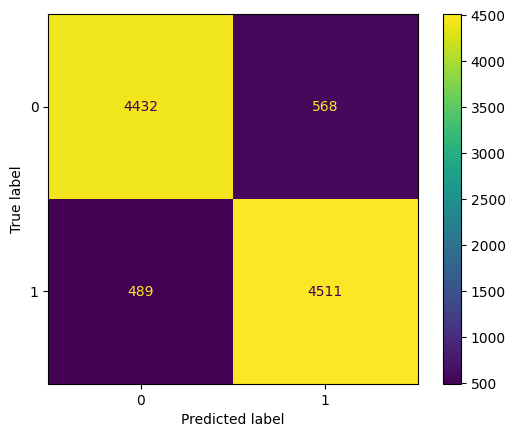

In [38]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
cm_display.plot()
plt.show()

In [39]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("Accuracy : ", accuracy_score(Y_test, X_test_prediction))
# print("Accuracy : ", (TN + TP)/ (FN + FP + TN + TP))
print("Precision : ", precision_score(Y_test, X_test_prediction))
# print("Precision : ", TP / (FP + TP))
print("Recall : ", recall_score(Y_test, X_test_prediction))
# print("Recall : ", TP / (FN+TP))
print("Error : ", (FN + FP) / (FN + FP + TN + TP))


Accuracy :  0.8943
Precision :  0.8881669620003938
Recall :  0.9022
Error :  0.1057


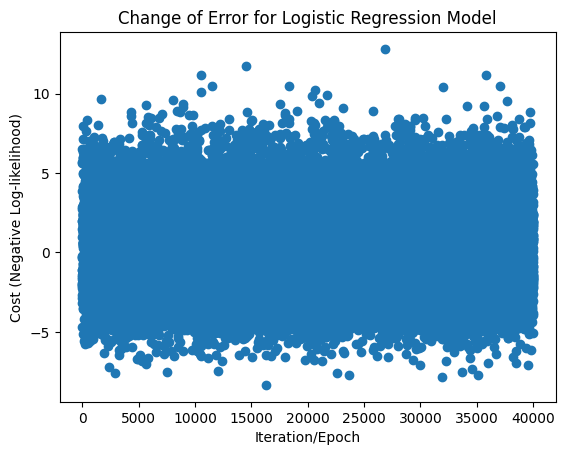

In [47]:
costs = -model.decision_function(X_train) * Y_train + np.log(1 + np.exp(-model.decision_function(X_train)))

# plt.plot(costs)
# plt.xlabel('Iteration/Epoch')
# plt.ylabel('Cost (Negative Log-likelihood)')
# plt.title('Change of Error for Logistic Regression Model')
# plt.show()

plt.scatter(range(len(costs)), costs)  # Use range for x-axis (iterations)
plt.xlabel('Iteration/Epoch')
plt.ylabel('Cost (Negative Log-likelihood)')
plt.title('Change of Error for Logistic Regression Model')
plt.show()
